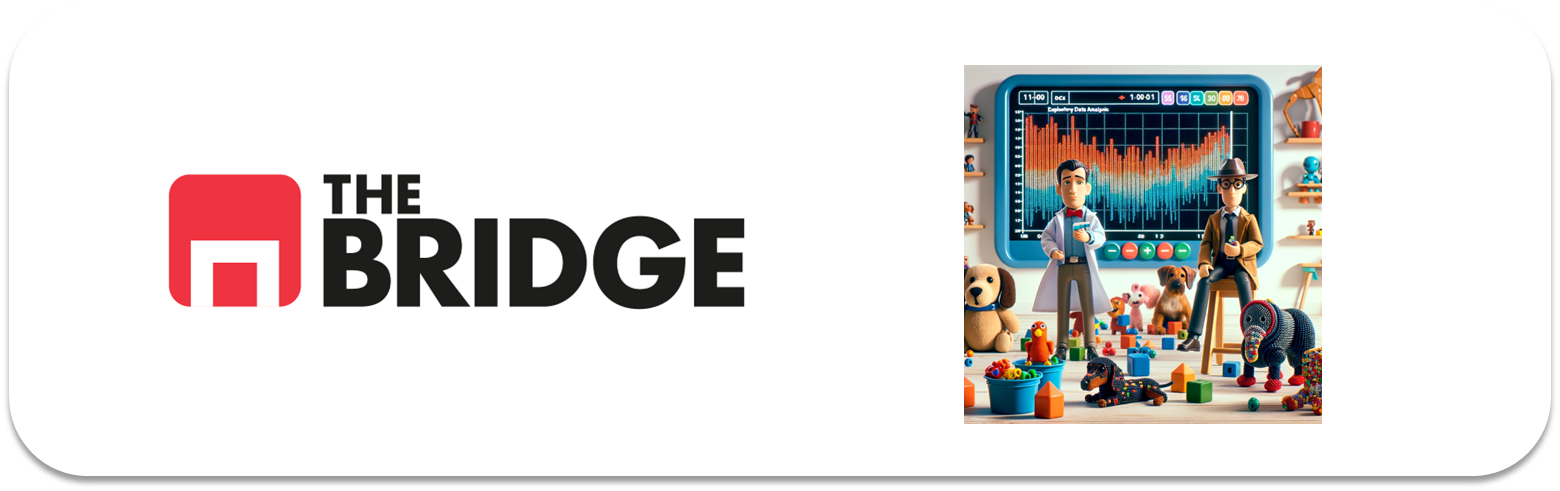

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bootcampviztools import *

from scipy import stats


## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
titanic = pd.read_csv("./data/titanic.csv")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
titanic = titanic.drop(columns=["deck", "survived", "pclass", "embarked"])
titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
titanic["family_members"] = titanic["parch"] + titanic["sibsp"]
titanic = titanic.drop(columns=["parch", "sibsp"])
titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [10]:
mode_embark = titanic["embark_town"].mode()[0]
titanic["embark_town"] = titanic["embark_town"].fillna(mode_embark)
titanic["embark_town"].isna().sum()

np.int64(0)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [9]:
mean_age = titanic["age"].mean()
titanic["age"] = titanic["age"].fillna(titanic["age"].mean())
titanic["age"].isna().sum()

np.int64(0)

### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?. 

En terminos absolutos, el grupo que mas sobrevivio fue las mujeres, luego los hombres y finalmente los niños.
En cambio en terminos relativos, las mujers fueron el primer grupo, pero los niños fueron el segundo y los hombres el ultimo grupo.

Sí, existe una relación estadísticamente significativa.
En términos absolutos:
- Murieron muchos más hombres que mujeres.
- Las mujeres supervivientes superan ampliamente a las fallecidas.
- Los hombres fallecidos superan con creces a los hombres supervivientes.

En términos relativos:
- 74% de las mujeres sobrevivieron.
- 19% de los hombres sobrevivieron.

Por lo que ser mujer multiplicaba por 3,89 veces la probabilidad de sobrevivir respecto a ser hombre.
Ademas el p-value segun el test chi-cuadrado es menor al 0,05 al ser:
- P-Value: 1.197357062775565e-58 por lo que los datos nos dan la razón que existe esa relación significativa

Respecto a ser adulto o ser niño. Hay pocos niños, pero sobreviven más de los que fallecen.
En los adultos, sobre todo si eres hombre no ocurre así, es más la mayoría no sobrevive.

En términos relativos:
- Niños: 59% sobreviven
- Mujeres adultas: 76% sobreviven
- Hombres adultos: 16% sobreviven

Los niños sobreviven más que los hombres adultos, pero menos que las mujeres adultas, esto entiendo que es debido a las mujers y los niños primero, respecto a montarse en las barcas de salvamento.

El p-value segun el test chi-cuadrado es menor al 0,05 al ser:
- P-Value: 0.0003921917414076711 por lo que los datos nos dan la razón que existe esa relación significativa

In [18]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pd.crosstab(titanic["sex"], titanic["alive"]))


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.197357062775565e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


In [19]:
from scipy.stats import chi2_contingency
titanic["adult_child"] = np.where(titanic["age"] < 18, "child", "adult")
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(titanic["adult_child"], titanic["alive"]))

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 12.56903165970517
P-Value: 0.0003921917414076711
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[479.37373737 298.62626263]
 [ 69.62626263  43.37373737]]


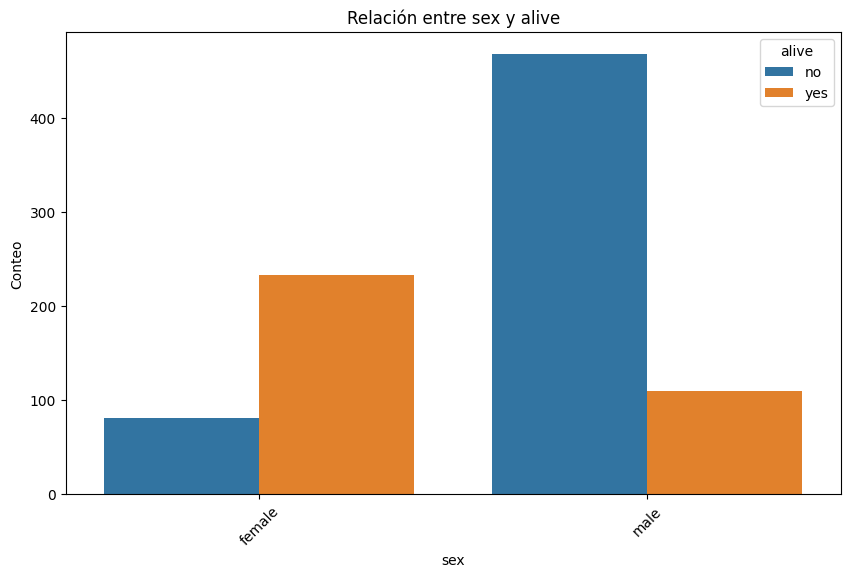

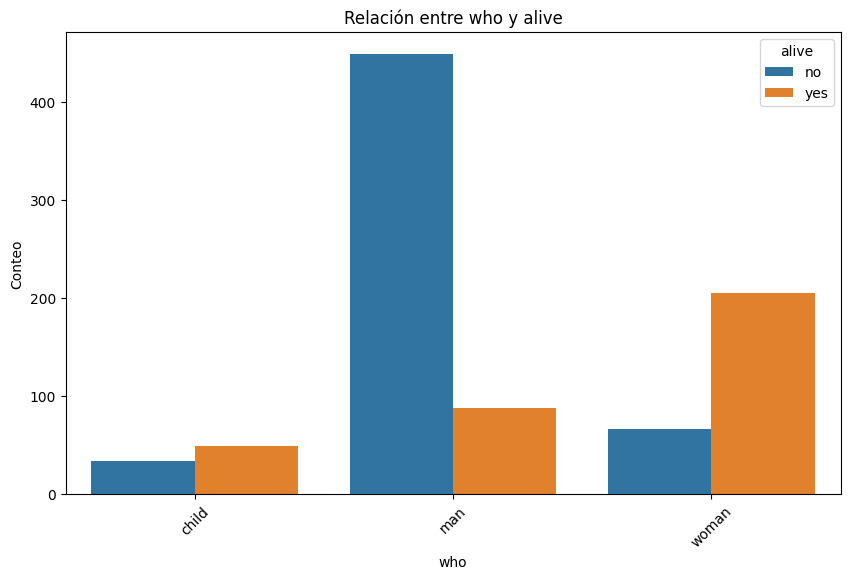

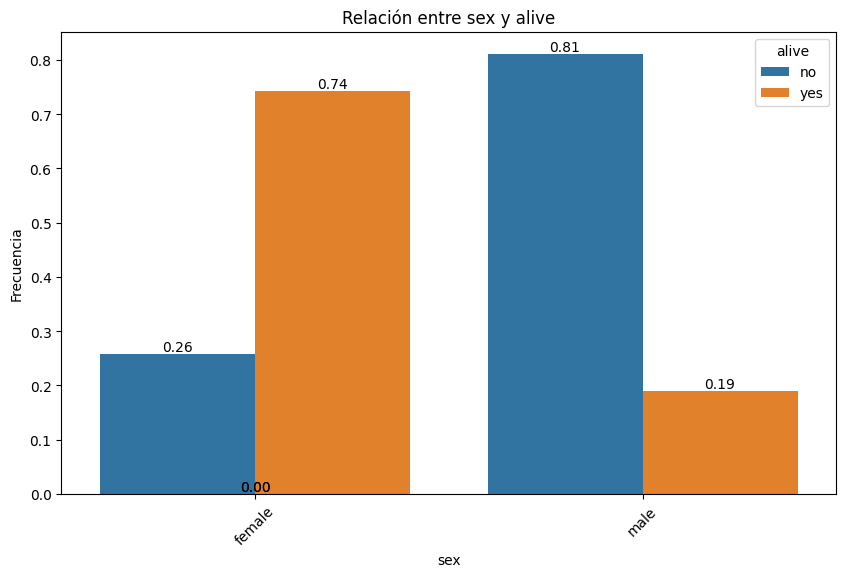

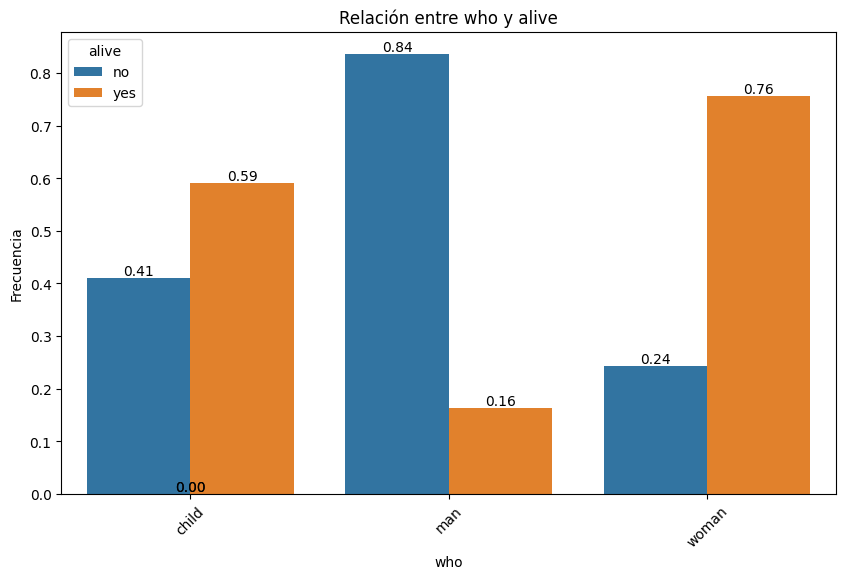

In [16]:
plot_categorical_relationship_fin(titanic, "sex", "alive")
plot_categorical_relationship_fin(titanic, "who", "alive")
plot_categorical_relationship_fin(titanic, "sex", "alive", relative_freq = True, show_values = True)
plot_categorical_relationship_fin(titanic, "who", "alive", relative_freq = True, show_values = True)

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

- En términos absolutos la primera clase es donde más gente sobrevivió, seguida de la tercera y la segunda.
- En términos relativos existe mucha diferencia de clases. La primera sobrevivió el 63%, la segunda clase el 47% y la tercera clase solo el 24%

- Sí, segun el test chi-cuadrado existe una relación estadisticamente significativa entre la clase y la supervivencia, ya que P-Value es 4.549251711298793e-23 valor mucho menor a 0.05


In [21]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pd.crosstab(titanic["class"], titanic["alive"]))


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


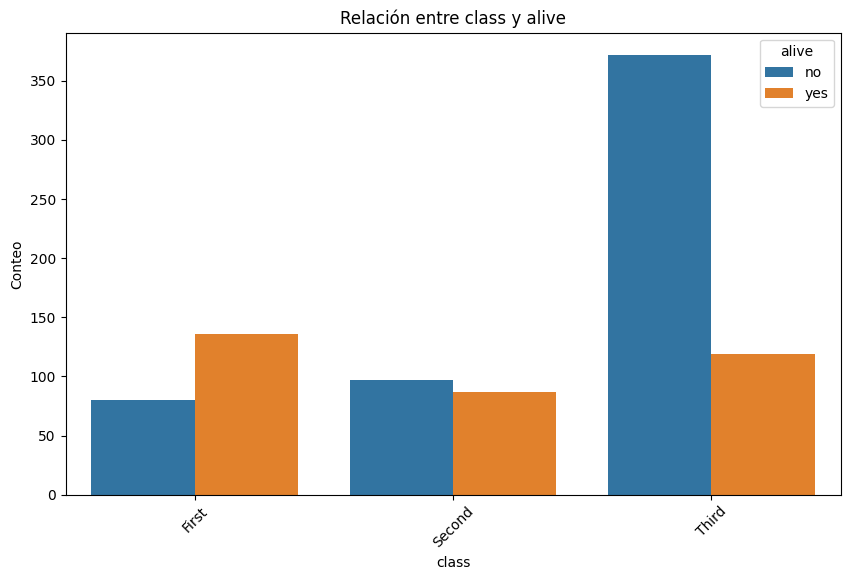

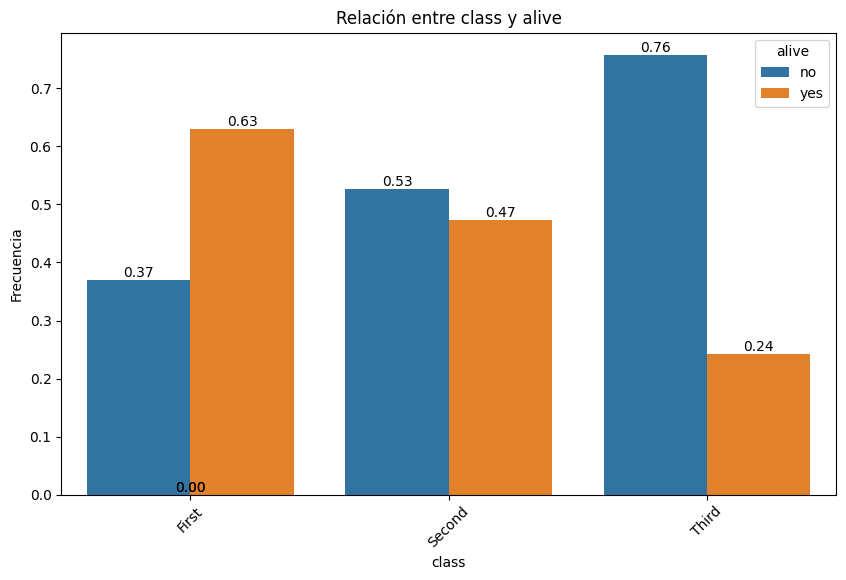

In [20]:
plot_categorical_relationship_fin(titanic, "class", "alive")
plot_categorical_relationship_fin(titanic, "class", "alive", relative_freq = True, show_values = True)

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
- El mayor número de supervivientes provenía de Southampton
- Pero provenían de Cherbourg en terminos relativos el mayor porcentaje de supervivientes

- Sí, existe una relación estadisitica significativa entre donde has embarcado y la supervivencia, ya que el p-value es: 2.3008626481449577e-06 bastante menor al 0.05

In [24]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pd.crosstab(titanic["embark_town"], titanic["alive"]))


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


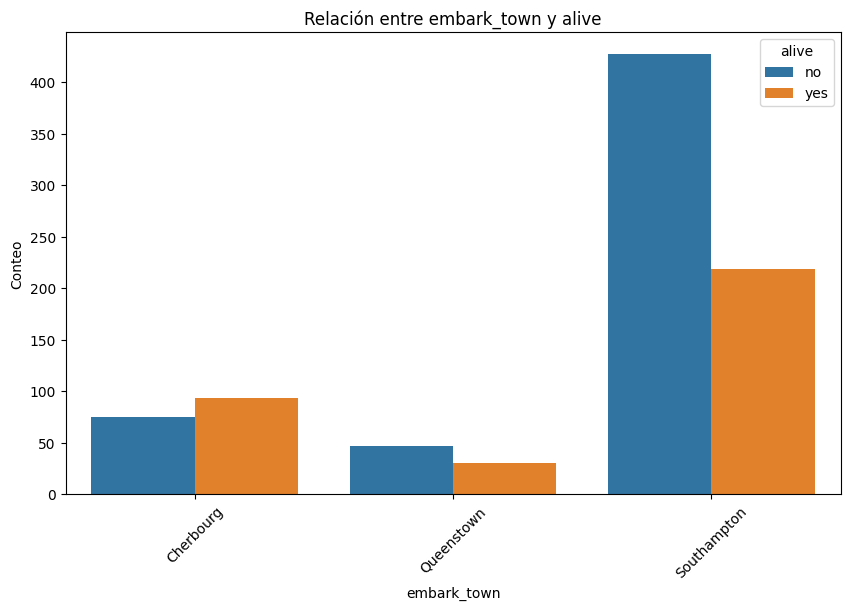

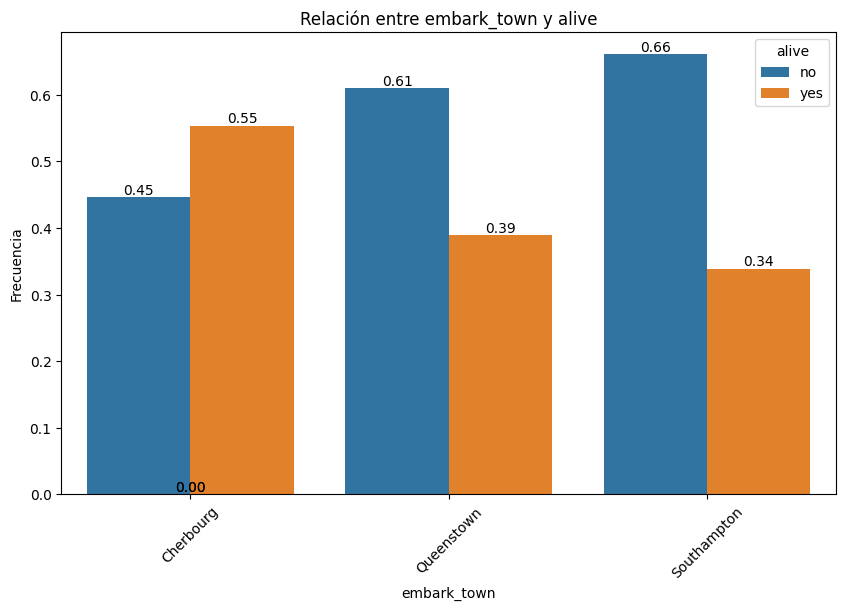

In [23]:
plot_categorical_relationship_fin(titanic, "embark_town", "alive")
plot_categorical_relationship_fin(titanic, "embark_town", "alive", relative_freq = True, show_values = True)

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

- A mayor precio del pasaje más posibilidades tenían de sobrevivir. Además que posee una relación estadisticamente significativa. tal y como se ve con el p-value que es 4.553477179250238e-22

In [30]:
from scipy.stats import mannwhitneyu
grupo_a = titanic.loc[titanic.alive == "no"]["fare"]
grupo_b = titanic.loc[titanic.alive == "yes"]["fare"]
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 57806.5
Valor p: 4.553477179250238e-22


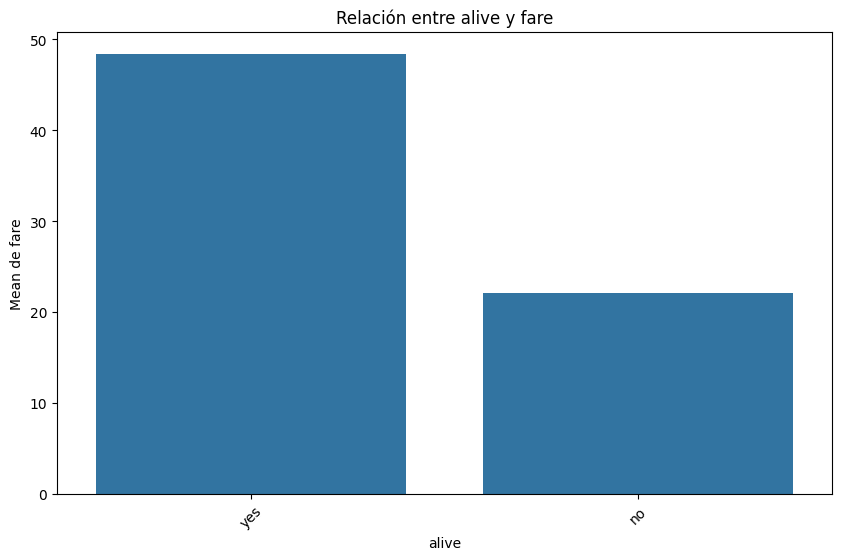

In [29]:
plot_categorical_numerical_relationship(titanic, "alive", "fare")

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?
- No pagaron 15 pasajeros, hombres adultos, que viajaban solos, que embarcaron en Southampton y que fueron a clases de pasajeros distintas, aunque solo 1 persona de las 15 y además de la tercera clase sobrevivió al contrario de lo que marcan las anteriores estadisticas de supervivenica donde primera clase sobrevivió el 63%, y aqui hay 5 marcado como tal, por lo que creo que fueron polizones y que les han asignado esos datos para que no fuesen nulos porque no se sabe mucho de ellos.
- La persona que mas dinero gastó en el billete: 
    * sex                  female
    * age                    35.0
    * fare               512.3292
    * class                 First
    * who                   woman
    * adult_male            False
    * embark_town       Cherbourg
    * alive                   yes
    * alone                  True
    * family_members            0
    * adult_child           adult



In [35]:
titanic[titanic["fare"] == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adult_child
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0,adult
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0,adult
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0,adult
277,male,29.699118,0.0,Second,man,True,Southampton,no,True,0,adult
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0,adult
413,male,29.699118,0.0,Second,man,True,Southampton,no,True,0,adult
466,male,29.699118,0.0,Second,man,True,Southampton,no,True,0,adult
481,male,29.699118,0.0,Second,man,True,Southampton,no,True,0,adult
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0,adult
633,male,29.699118,0.0,First,man,True,Southampton,no,True,0,adult


In [33]:

titanic.loc[titanic["fare"].idxmax()]


sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
adult_child           adult
Name: 258, dtype: object

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.
- En Cherbourg, el precio medio del billete es claramente más alto que en las otras ciudades. Además, los pasajeros que sobrevivieron desde esta ciudad tienden a haber pagado más que los que fallecieron, ya que como se vio en estadisticas anteriores cuanto mas pagabas mas posibildiades de sobrevivir.

- En Southampton, hay muchos pasajes baratos. En esta ciudad se concentran muchos fallecidos y sus pasajes son, en promedio, más baratos que los de los supervivientes.

- En Queenstown, los pasajes también son más baratos que en Cherbourg y la supervivencia es más baja. De media los pasajes son menos de la mitad que en Cherbourg


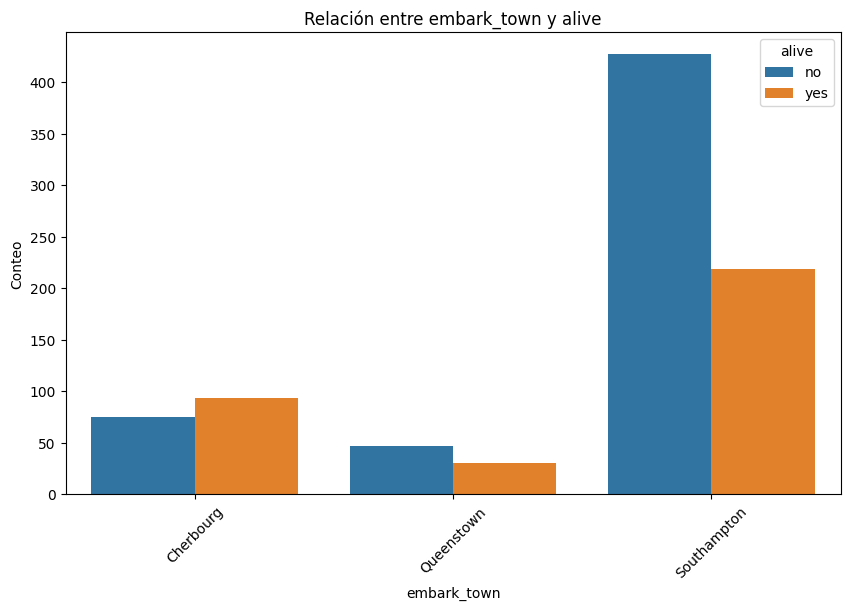

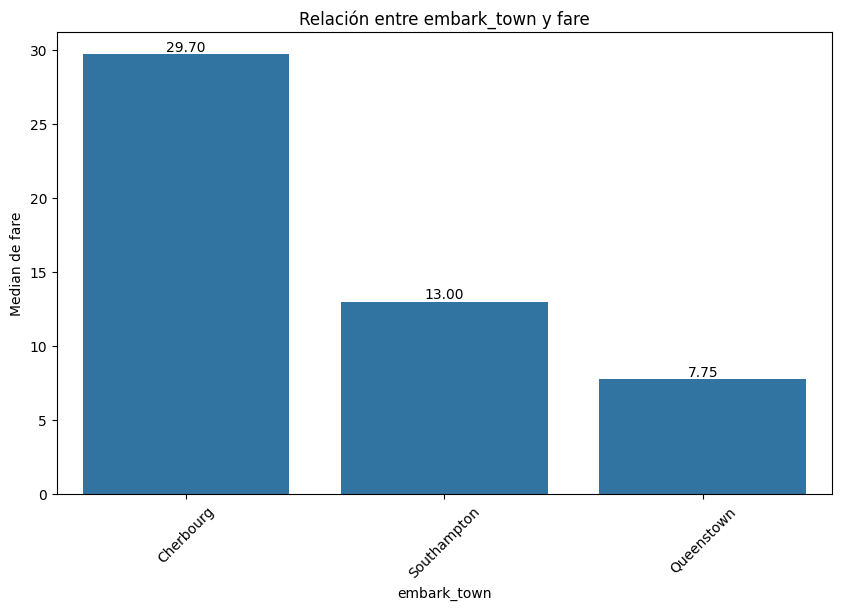

In [37]:
plot_categorical_relationship_fin(titanic, "embark_town", "alive")
plot_categorical_numerical_relationship(titanic, "embark_town", "fare",measure="median", show_values=True)

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?
- En terminos aboslutos la que mas sobrevivio eran las persona de primera clase cuya edad se comprendiese entre los 18 y 30 años
- En terminos relativos los que mas sobrevivieron eran los niños entre 0 y 10 años que viajaban en primera clase


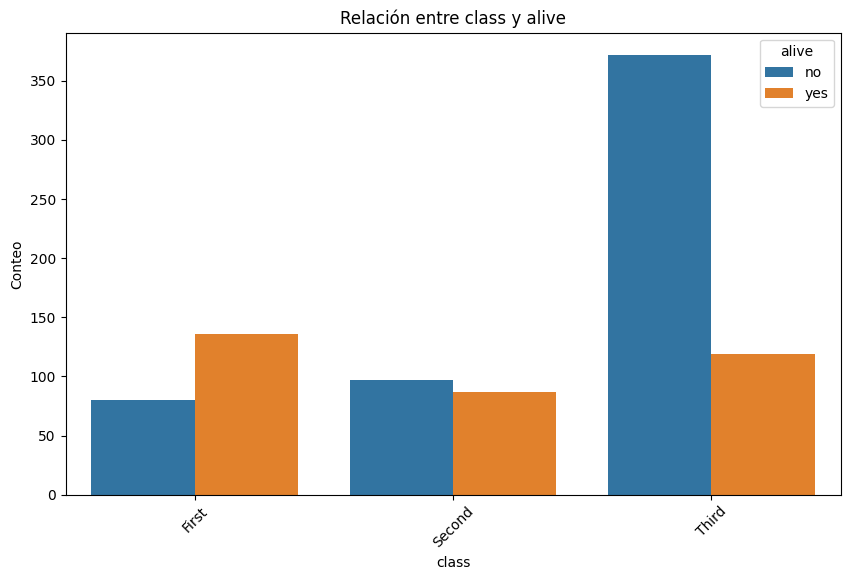

/Users/jorge/bridge/code/ONLINE_DS_THEBRIDGE_jorgegp/Sprint_07/Unidad_02_Estadistica_Descriptiva_Multivariante/03_Practica_Obligatoria/bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


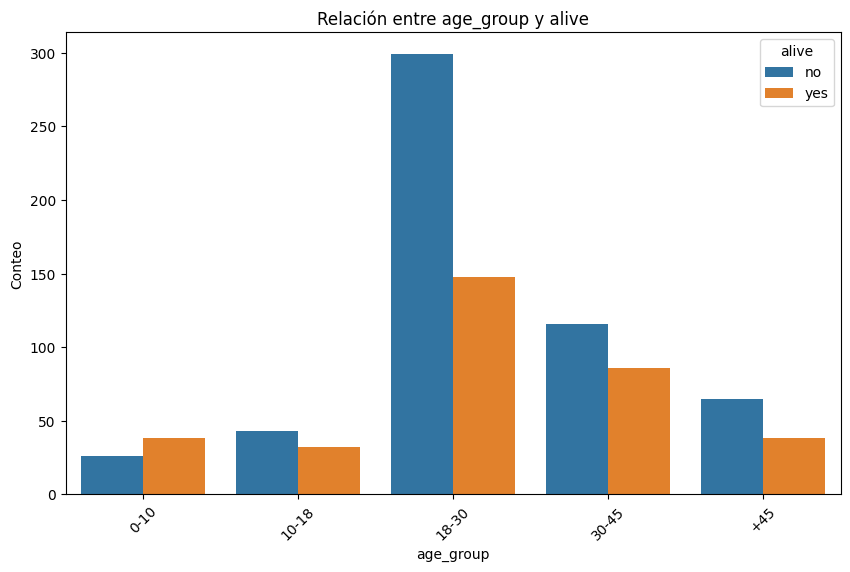

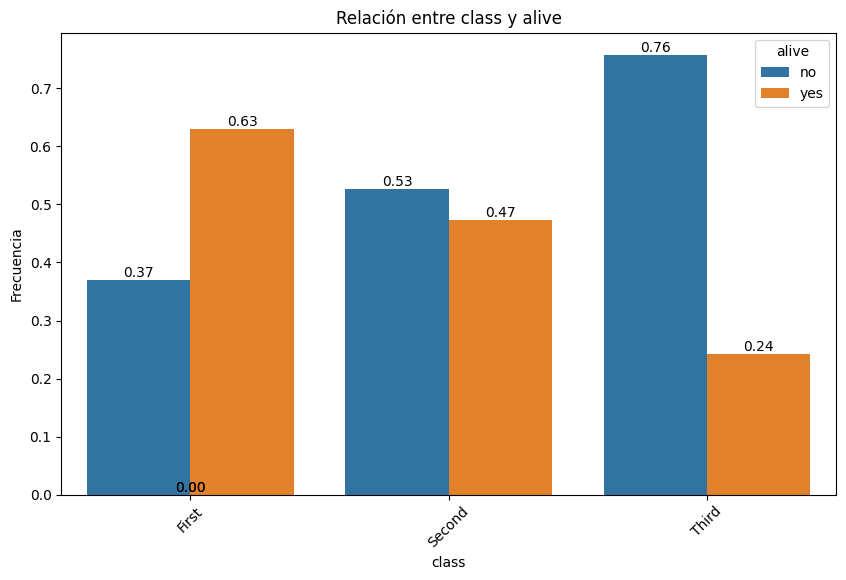

/Users/jorge/bridge/code/ONLINE_DS_THEBRIDGE_jorgegp/Sprint_07/Unidad_02_Estadistica_Descriptiva_Multivariante/03_Practica_Obligatoria/bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


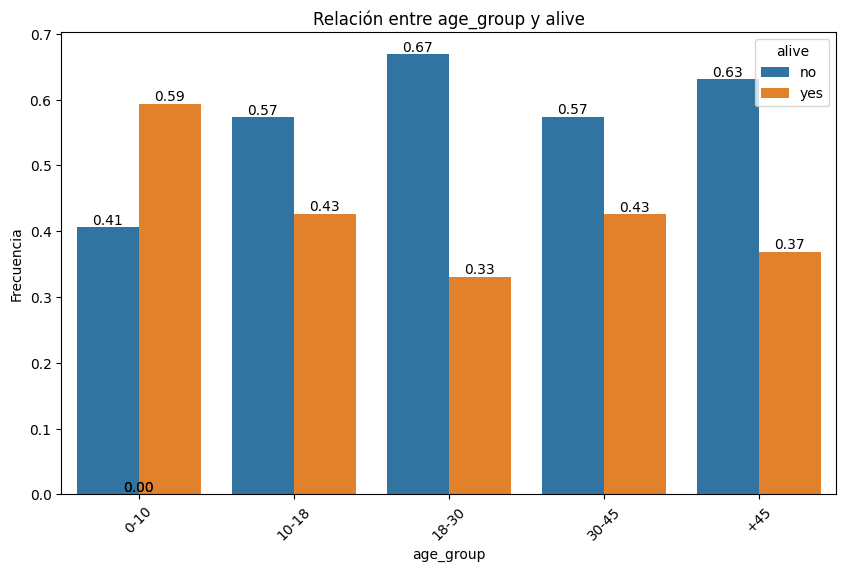

In [40]:
bins = [0, 10, 18, 30, 45, 90]
labels = ["0-10", "10-18", "18-30", "30-45", "+45"]
titanic["age_group"] = pd.cut(titanic["age"], bins=bins, labels=labels)
plot_categorical_relationship_fin(titanic,"class","alive")
plot_categorical_relationship_fin(titanic,"age_group","alive")

plot_categorical_relationship_fin(titanic,"class","alive", relative_freq = True, show_values = True)
plot_categorical_relationship_fin(titanic,"age_group","alive", relative_freq = True, show_values = True)

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?
- La relación entre edad y coste del billete es muy débil (correlación 0,09). Los billetes caros aparecen prácticamente en cualquier edad, si acaso a partir de los 10, pero podemos encontrar tanto billetes baratos como caros en cualquier edad. Teniendo en cuenta esto con los análisis previos, se la probabilidad de supervivencia está mucho más ligada al dinero pagado por el embarque que a la edad en si.
- Casi todos los tripulantes viajaban solos, habia pocas familias, por lo que parece que realmente iban a EEUU a buscar nuevas oportunidades y salir de su vida actual, de haí que tampoco exista mucha correlación que las familias paguen billetes mas caros

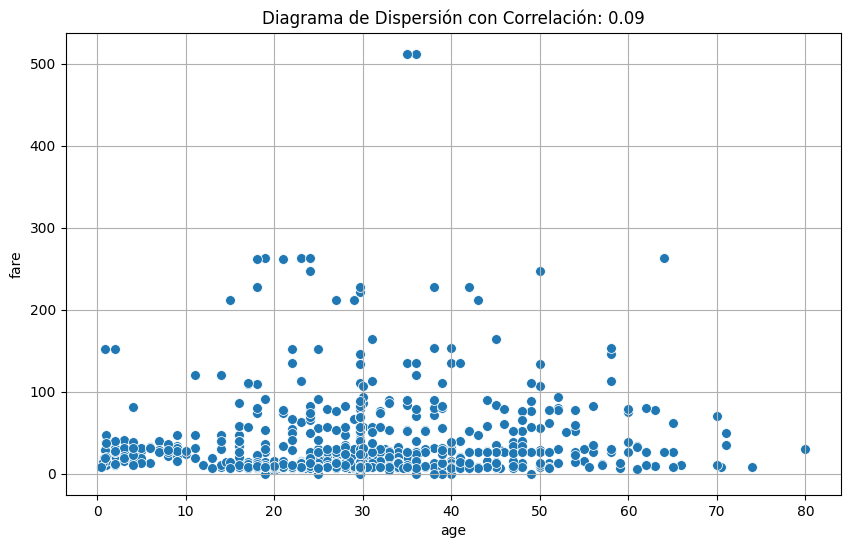

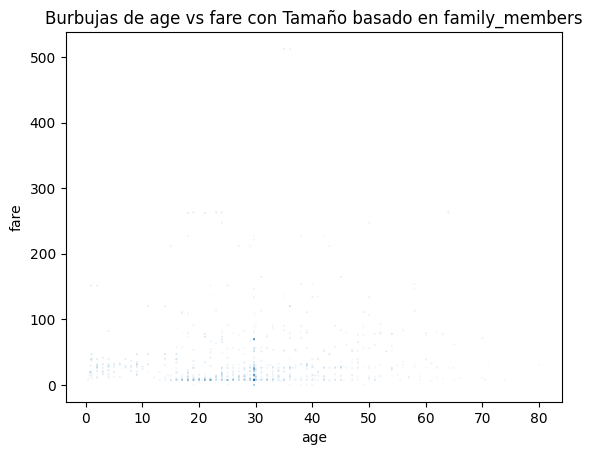

In [41]:
grafico_dispersion_con_correlacion(titanic, "age", "fare", mostrar_correlacion=True)
bubble_plot(titanic, "age", "fare", "family_members")

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

Tenemos el mayor número de vuelos pero nuestros ingresos considerando la mediana son los menores de todos.

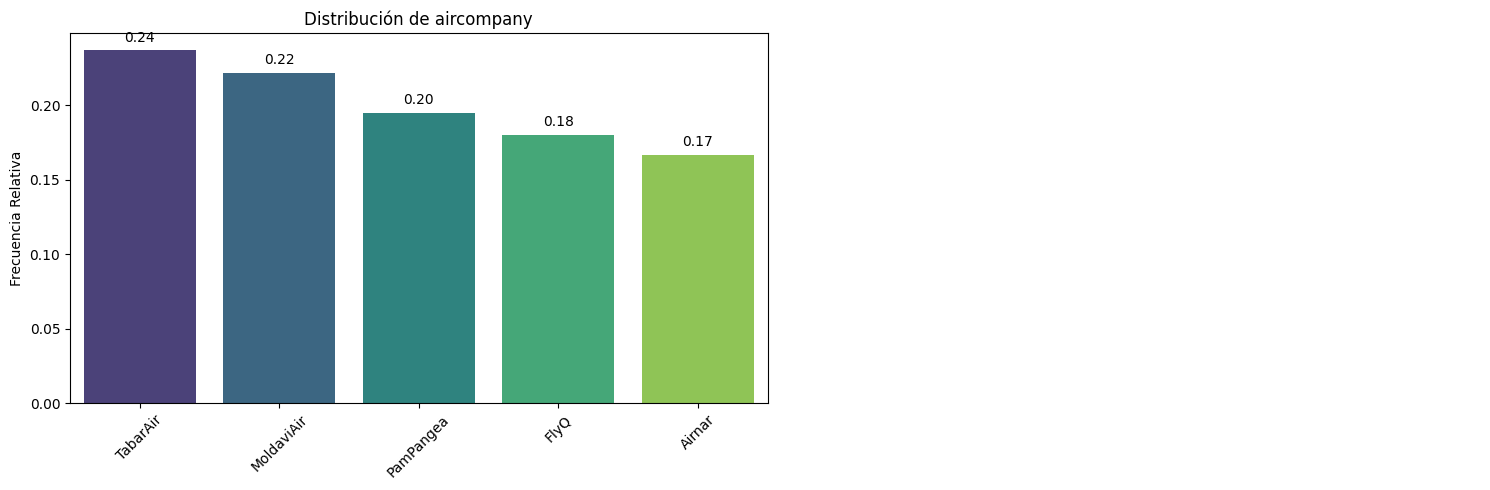

(2,)


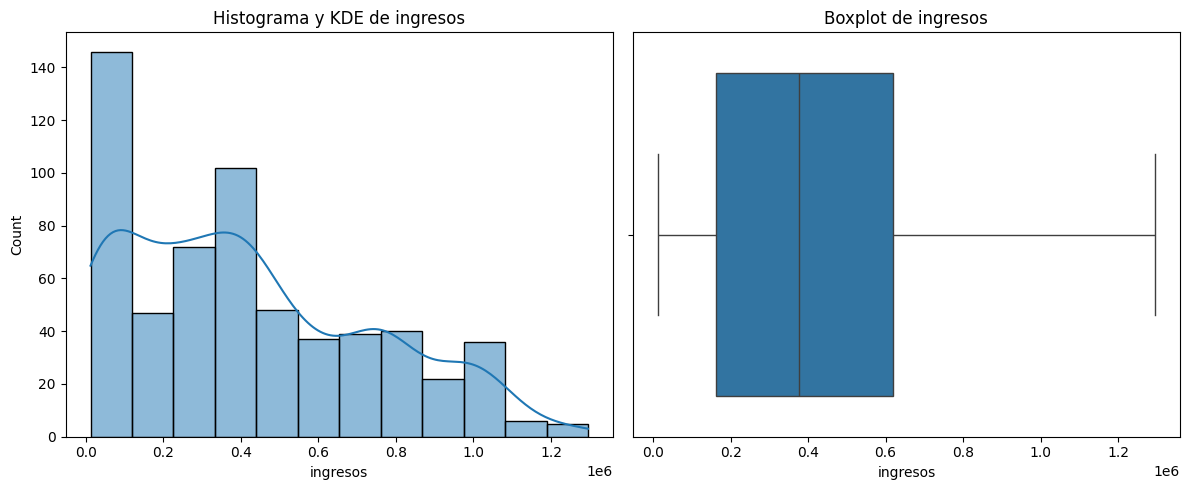

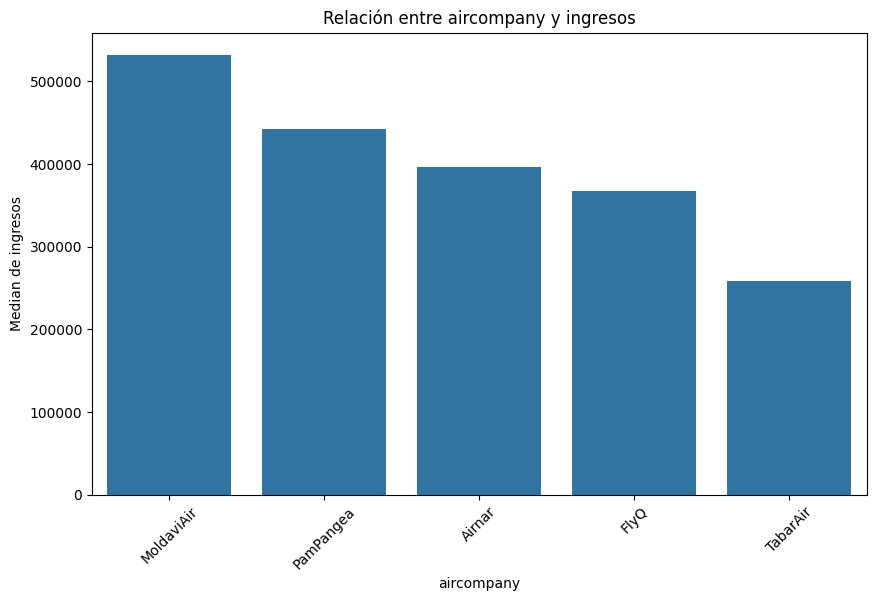

In [48]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun.csv")

pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)
plot_combined_graphs(df_air_jun,["ingresos"])
plot_categorical_numerical_relationship(df_air_jun, "aircompany","ingresos",measure="median") # Utilizando mediana

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

El tamaño de las burbujas depende de los ingresos, se ve la correlación entre distancia y consumo, auque claramene hay una línea de vuelos mucho más eficientes y si nos fijamos en los tamaños de las burbujas de una línea y otra son aparentemente similares.  

(3, 2)


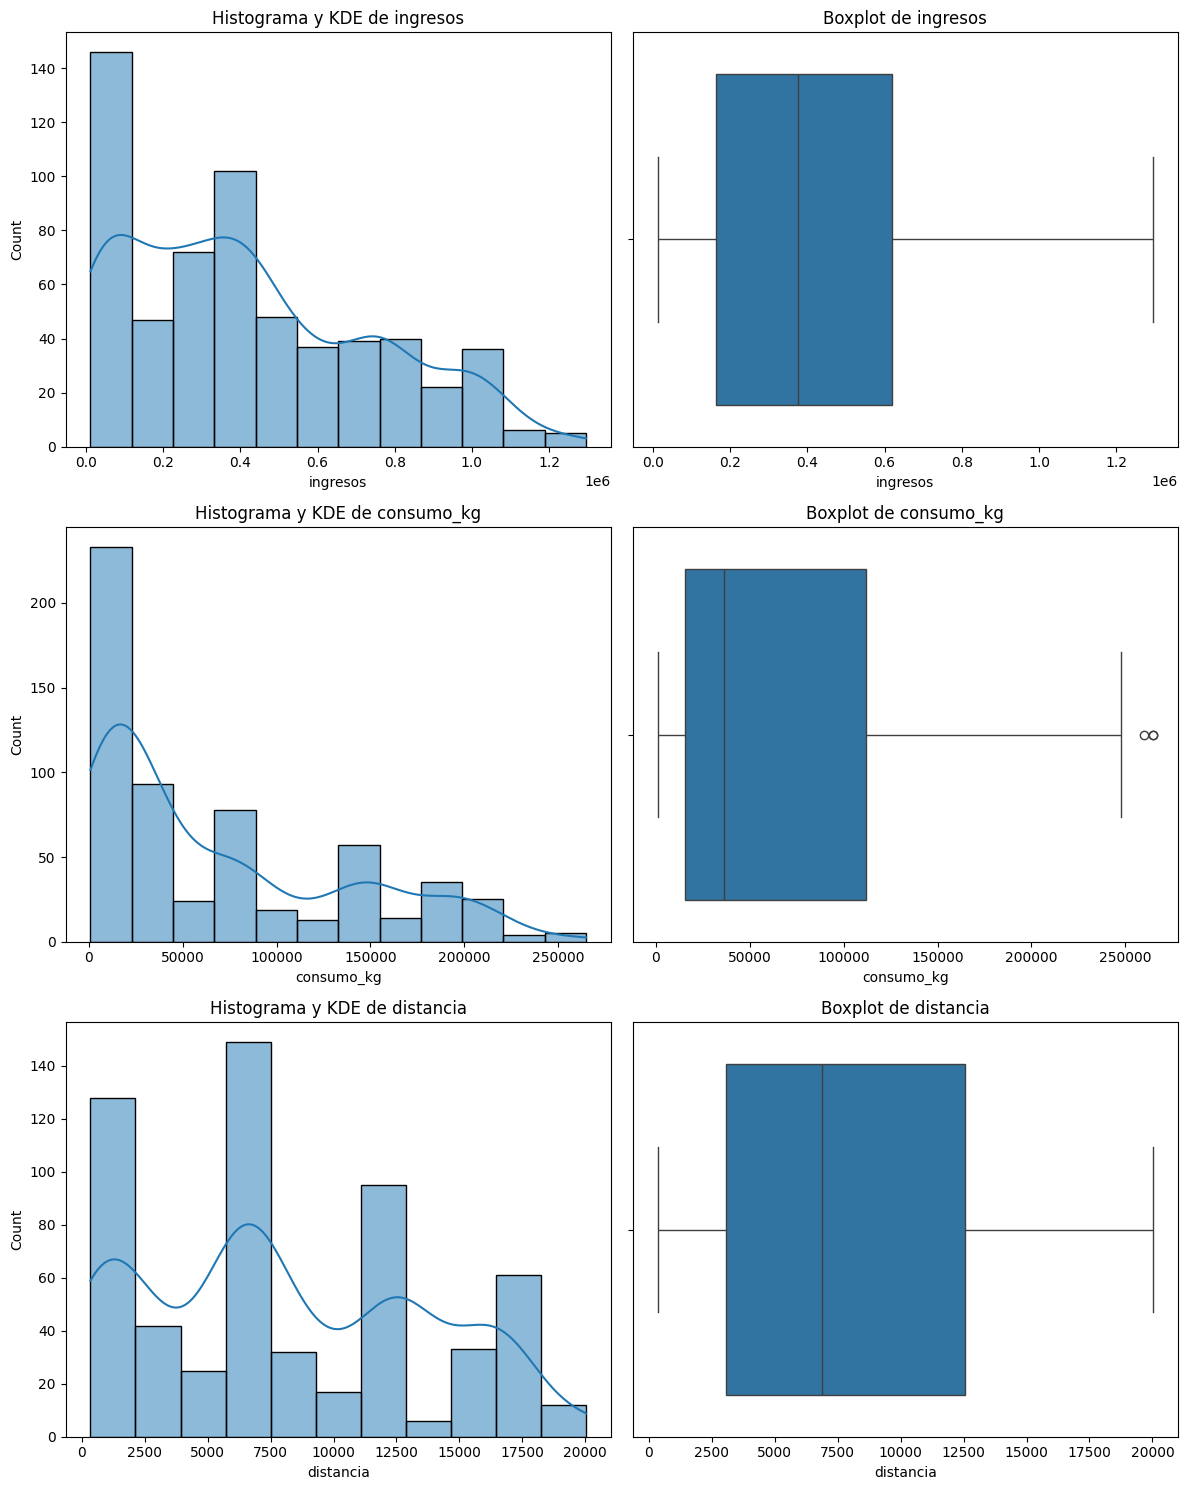

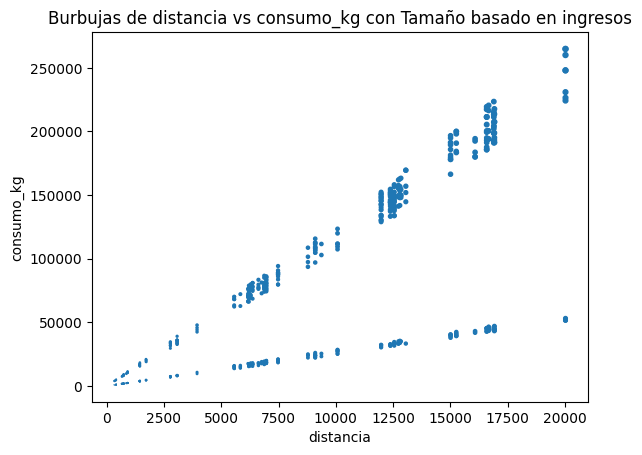

In [58]:
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

El análisis mediante el gráfico de burbujas muestra que el consumo de combustible aumenta de manera muy clara y progresiva a medida que aumenta la categoría de vuelo. Los vuelos muy cortos presentan consumos bajos, pero relativamente altos para la distancia recorrida, mientras que los vuelos largos y muy largos muestran consumos muy elevados, pero las burbujas tienden a ser mayores en vuelos de larga distancia, indicando que estos vuelos generan mayores ingresos.

In [53]:
df_air_jun["distancia"].describe()

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

/Users/jorge/bridge/code/ONLINE_DS_THEBRIDGE_jorgegp/Sprint_07/Unidad_02_Estadistica_Descriptiva_Multivariante/03_Practica_Obligatoria/bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


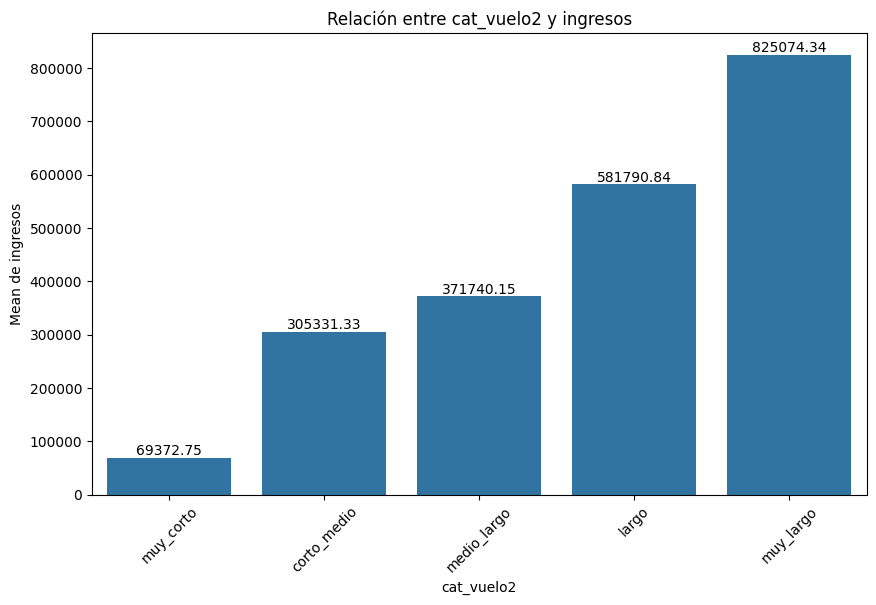

/Users/jorge/bridge/code/ONLINE_DS_THEBRIDGE_jorgegp/Sprint_07/Unidad_02_Estadistica_Descriptiva_Multivariante/03_Practica_Obligatoria/bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


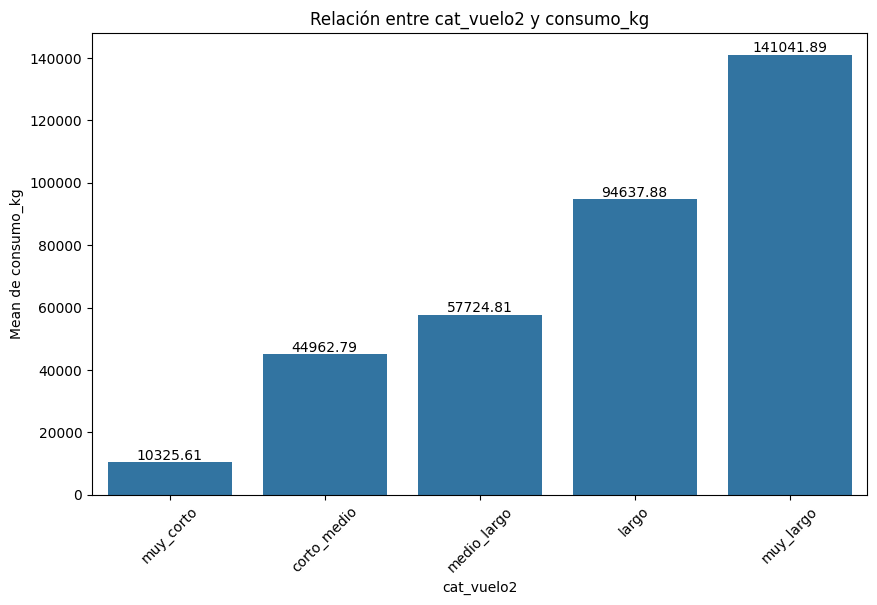

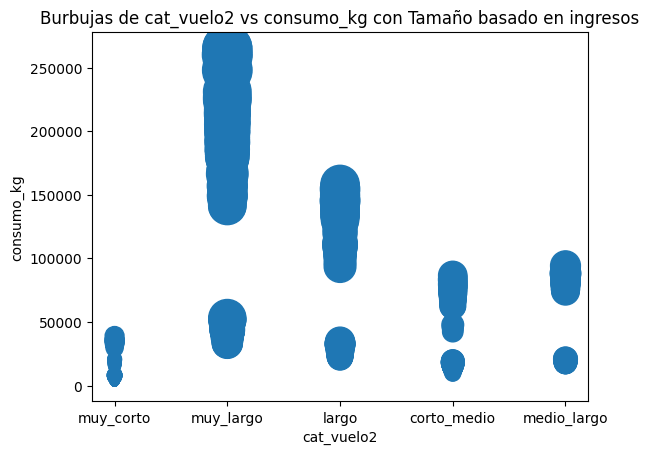

In [72]:

bins = [0, 3073, 6877, 8071, 12553, df_air_jun["distancia"].max()]
labels = ["muy_corto", "corto_medio", "medio_largo", "largo","muy_largo"]

df_air_jun["cat_vuelo2"] = pd.cut(df_air_jun["distancia"], bins=bins, labels=labels, include_lowest=True)
df_air_jun["cat_vuelo2"].value_counts()

plot_categorical_numerical_relationship(df_air_jun,categorical_col="cat_vuelo2",numerical_col="ingresos",measure="mean",show_values=True)
plot_categorical_numerical_relationship(df_air_jun,categorical_col="cat_vuelo2",numerical_col="consumo_kg",measure="mean",show_values=True)

bubble_plot(df_air_jun,"cat_vuelo2","consumo_kg","ingresos")



